# Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from tensorflow.keras.preprocessing import image
from PIL import Image
import keras.preprocessing.image
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.keras import balanced_batch_generator
from tensorflow.keras.callbacks import EarlyStopping
import os
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

Init Plugin
Init Graph Optimizer
Init Kernel


In [ ]:
#Defining variables
data_dir = 'Datasets/GTSRB'
train_path = "Datasets/GTSRB/Train"
img_height = 50
img_width = 50
# Dictionary of the 43 different types of signs
categories =  { 0:'Speed limit (20km/h)',
                1:'Speed limit (30km/h)',
                2:'Speed limit (50km/h)',
                3:'Speed limit (60km/h)',
                4:'Speed limit (70km/h)',
                5:'Speed limit (80km/h)',
                6:'End of speed limit (80km/h)',
                7:'Speed limit (100km/h)',
                8:'Speed limit (120km/h)',
                9: 'No passing',
                10:'No passing veh over 3.5 tons',
                11:'Right-of-way at intersection',
                12:'Priority road',
                13:'Yield',
                14:'Stop',
                15:'No vehicles',
                16:'Veh > 3.5 tons prohibited',
                17:'No entry',
                18:'General caution',
                19:'Dangerous curve left',
                20:'Dangerous curve right',
                21:'Double curve',
                22:'Bumpy road',
                23:'Slippery road',
                24:'Road narrows on the right',
                25:'Road work',
                26:'Traffic signals',
                27:'Pedestrians',
                28:'Children crossing',
                29:'Bicycles crossing',
                30:'Beware of ice/snow',
                31:'Wild animals crossing',
                32:'End speed + passing limits',
                33:'Turn right ahead',
                34:'Turn left ahead',
                35:'Ahead only',
                36:'Go straight or right',
                37:'Go straight or left',
                38:'Keep right',
                39:'Keep left',
                40:'Roundabout mandatory',
                41:'End of no passing',
                42:'End no passing veh > 3.5 tons' }
# number of categories
num_categories = 43

# Preprocessing Image and CSV data

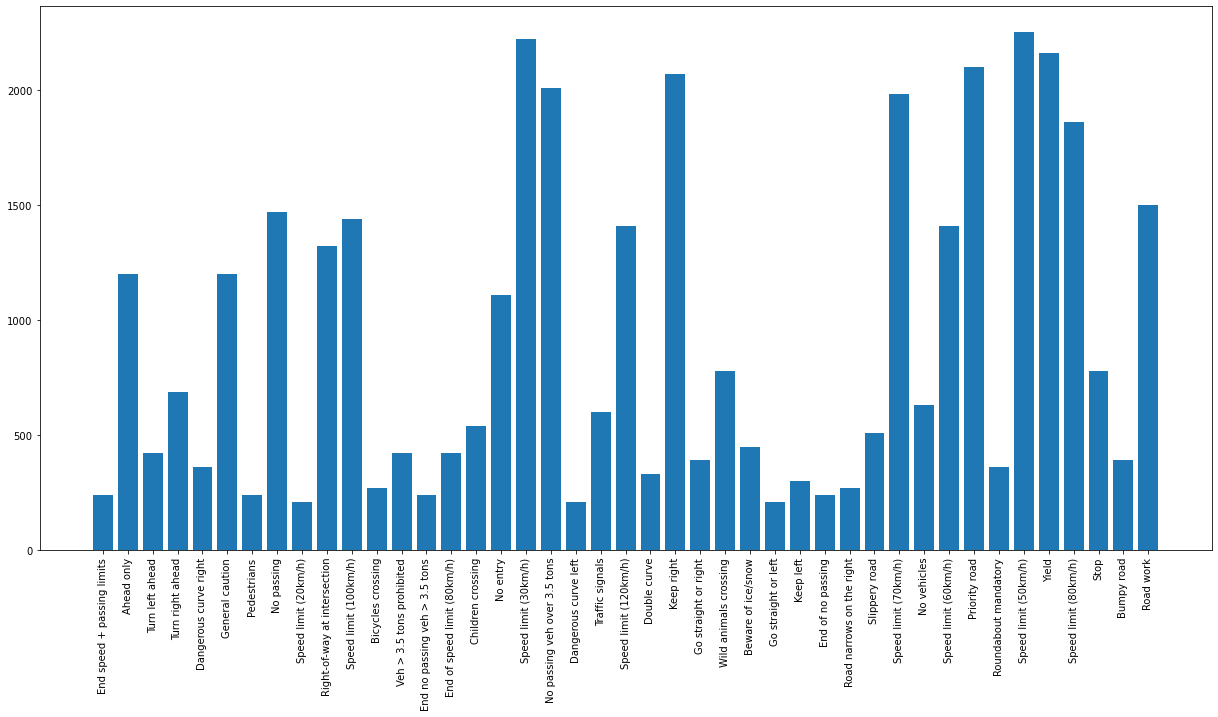

In [ ]:
# Graphing Train Distribution
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(categories[int(folder)])



plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

## ClassId is the target variable model is training on

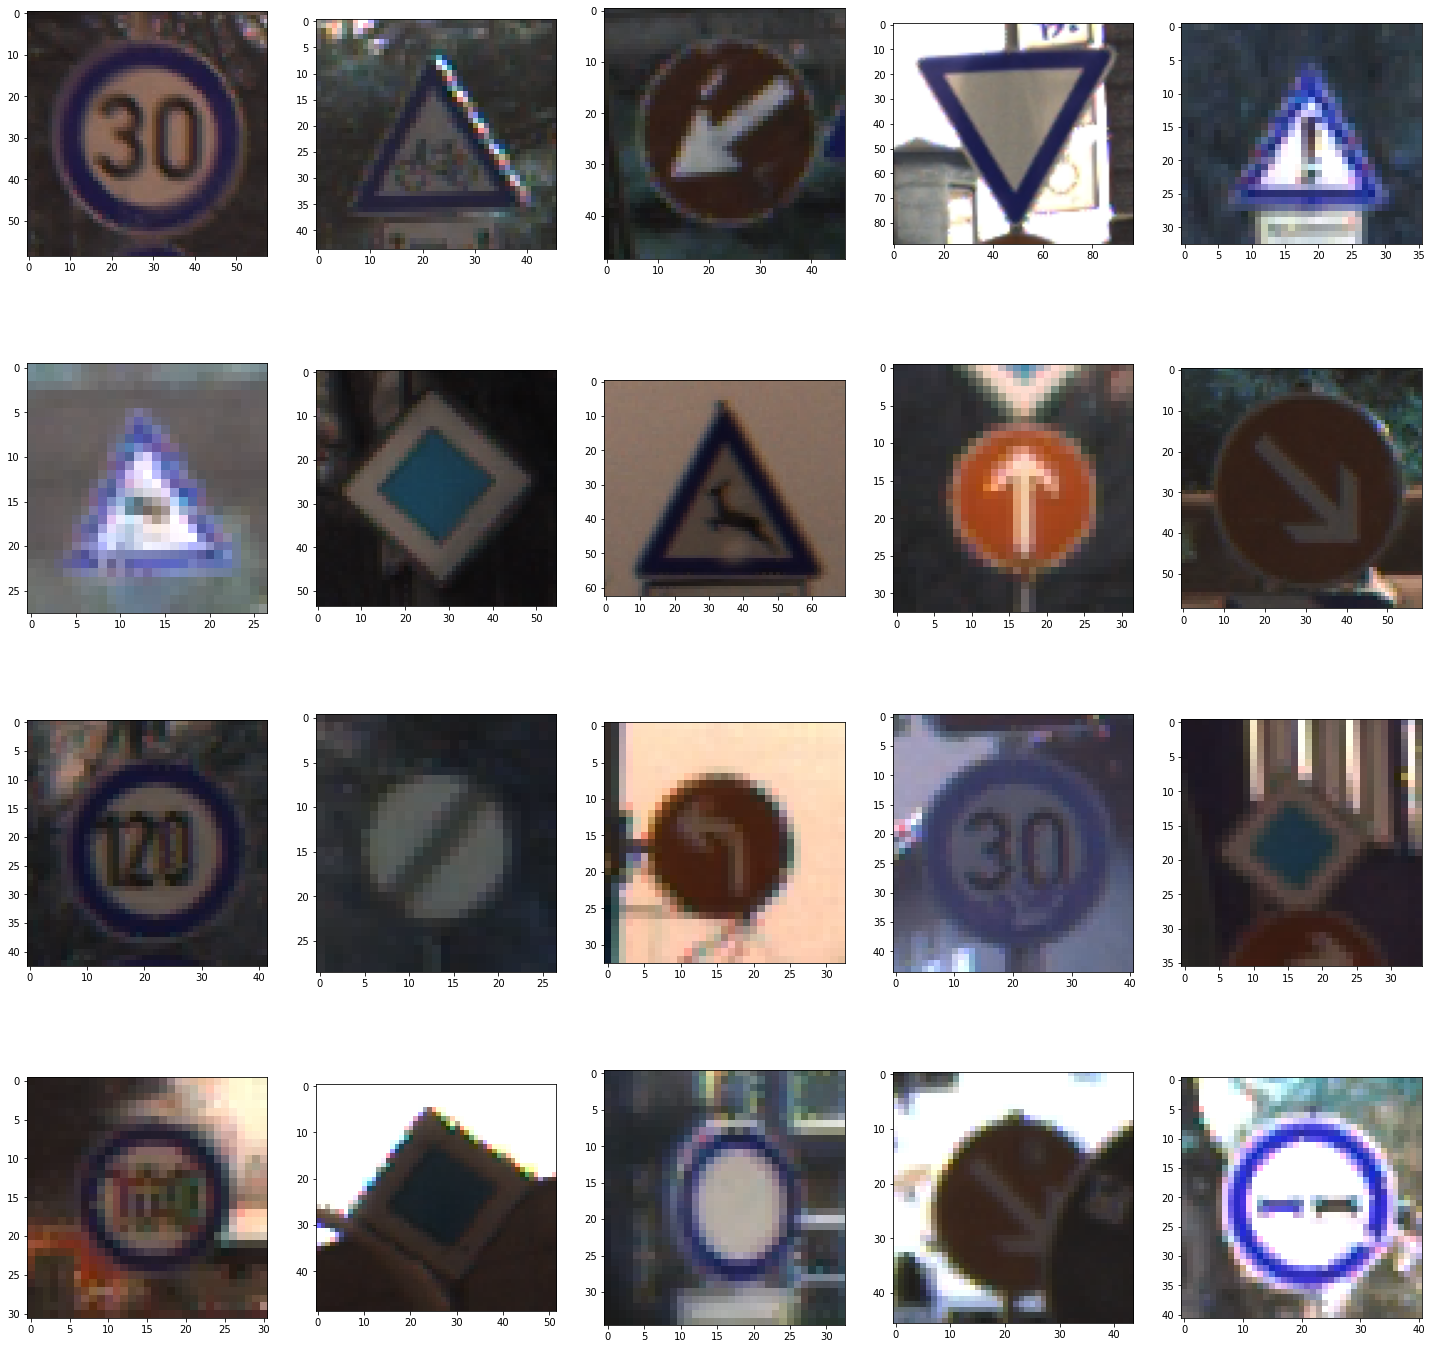

In [ ]:
train = pd.read_csv(data_dir + '/Train.csv')
imgs = train["Path"].values

plt.figure(figsize=(25,25))

# Displays 20 random images
for i in range(1,21):
    plt.subplot(4,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = cv2.imread(random_img_path)
    plt.imshow(rand_img)

In [ ]:
image_data = []
image_labels = []

for i in range(num_categories):
    path = train_path + '/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img) # Reads the image at the specified path using opencv
            image_fromarray = Image.fromarray(image, 'RGB') # Converts image into a Pillow Image
            resize_image = image_fromarray.resize((img_height, img_width)) # Resizes all images in train to (50,50)
            image_data.append(np.array(resize_image)) # Adds the array of the resized image to the image data array
            image_labels.append(i) # Adds the correct label to the image
        except:
             print("Error in " + img) # Was having problems with images so I used a try/except
                                      # I found that the dataset had a couple images that were mislabeled

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Check shape of training data
# (39209, 50, 50) means there are 39209 50 x 50 images
print(image_data.shape, image_labels.shape)

(39209, 50, 50, 3) (39209,)


In [ ]:
image_data[0] # # Each number represents the lightness or darkness of that area of the image

array([[[166, 170, 188],
        [160, 165, 195],
        [103, 128, 171],
        ...,
        [ 95, 132, 182],
        [ 97, 133, 184],
        [ 92, 127, 183]],

       [[171, 172, 185],
        [135, 135, 168],
        [ 96, 117, 166],
        ...,
        [ 92, 128, 179],
        [ 95, 126, 179],
        [ 91, 123, 180]],

       [[153, 167, 178],
        [103, 123, 157],
        [ 85, 113, 162],
        ...,
        [ 85, 119, 162],
        [ 87, 118, 163],
        [ 84, 116, 164]],

       ...,

       [[105, 100,  99],
        [105,  99,  99],
        [ 97,  98,  99],
        ...,
        [104, 107, 110],
        [110, 114, 118],
        [111, 115, 121]],

       [[109, 109, 106],
        [105, 105, 103],
        [102, 106, 103],
        ...,
        [104, 108, 105],
        [109, 112, 111],
        [106, 108, 109]],

       [[ 93, 100,  98],
        [ 94, 104, 102],
        [101, 106, 105],
        ...,
        [107, 110, 111],
        [105, 108, 108],
        [107, 108, 107]]

In [ ]:
# Split our train data set into train and test sets with 20% going to test. Also shuffles the data.
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255  # Scaling RGB values between 0 and 1 for normalization
X_test = X_test/255

# Check shape of y_train
print(y_train.shape)

# Give each category/label a number through one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

print(y_train.shape)
print(y_test.shape)

(31367,)
(31367, 43)
(7842, 43)


In [ ]:
# Check y_train
y_train[:num_categories] # vectorized form of categories

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Augmenting Data

In [ ]:
# Data Augmentation
## The ImageDataGenerator function creates augmented images while training to make up for the data imbalance
train_datagen = ImageDataGenerator(
     rotation_range=10,
     zoom_range=0.15,
     width_shift_range=0.1,
     height_shift_range=0.1,
     shear_range=0.15,
     horizontal_flip=False,
     vertical_flip=False,
     fill_mode="nearest",
     validation_split = 0.2) # Validation split used when model is fit

# Training a simple CNN with one Convolutional Layer

In [ ]:
model_simple = Sequential()

model_simple.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(img_height,img_width, 3)))
model_simple.add(BatchNormalization())
model_simple.add(MaxPooling2D(pool_size = (2, 2)))
model_simple.add(Dropout(0.2)) # Dropout layer for regularization, low input because Batch Normalization is also regularizing

model_simple.add(Flatten())
model_simple.add(BatchNormalization())
model_simple.add(Dropout(0.4))
model_simple.add(Dense(43, activation = 'softmax')) # The categorical_crossentropy loss
# requires the same number of neurons as categories in the final output layer.

epochs = 70
lr = 0.001
model_simple.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Metal device set to: Apple M1


2022-03-08 16:39:59.849819: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-08 16:39:59.850604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
model_fit = model_simple.fit(train_datagen.flow(X_train, y_train, batch_size=32), epochs = epochs,
                      validation_data = train_datagen.flow(X_train, y_train, batch_size = 32,
                      subset = 'validation'), steps_per_epoch = 60)

### Can we improve this train accuracy?

# Training Real CNN Model

### How I chose hyper-parameters for each layer and the number of convolutional layers
#### I tried using 1, 2, 3, and 4 convolutional layers, 4 provided the best results. However, 4 led to a lot of parameters in the model and I had to use regularization in many different forms. For example, I used Batch Normalization to prevent internal covariate shift which can reduce accuracy and increase loss by fixing the distributions of inputs after each layer for normalization. I also used Dropout and Padding for increased performance and overfit prevention. For filter sizes of convolutional layers, I messed with large to small and small to large. Filter sizes of 32 and 64 worked very well as they helped to keep the total number of parameters down. The activation function, relu, is known for being the best for image classification which I used it for every layer except for the last. Towards the end, I added a dense layer of size 256 in order to ensure high accuracy. Finally, in order to make use of probability, the softmax activation function is essentially required for the last dense layer.

In [ ]:
# Instantiate a CNN.
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(img_height,img_width, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(img_height,img_width, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2)) # Dropout layer for regularization, low input because Batch Normalization is also regularizing

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(img_height,img_width, 3), padding = 'same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(img_height,img_width, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(43, activation = 'softmax')) # The categorical_crossentropy loss
# requires the same number of neurons as categories in the final output layer.

epochs = 90
lr = 0.001
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Steps per epoch is 60 in order to see updates in loss and accuracy frequently
model_fit = model.fit(train_datagen.flow(X_train, y_train, batch_size=32), epochs = epochs,
                      validation_data = train_datagen.flow(X_train, y_train, batch_size = 32,
                      subset = 'validation'), steps_per_epoch = 60)

2022-03-08 16:40:16.870157: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-08 16:40:16.871430: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/90


2022-03-08 16:40:17.126191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


60/60 [==============================] - ETA: 0s - loss: 3.7722 - accuracy: 0.1344

2022-03-08 16:40:19.353134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


60/60 [==============================] - 5s 69ms/step - loss: 3.7722 - accuracy: 0.1344 - val_loss: 3.7844 - val_accuracy: 0.0445
Epoch 2/90
60/60 [==============================] - 4s 65ms/step - loss: 2.7934 - accuracy: 0.2719 - val_loss: 4.2754 - val_accuracy: 0.0303
Epoch 3/90
60/60 [==============================] - 4s 66ms/step - loss: 2.2891 - accuracy: 0.3703 - val_loss: 4.5316 - val_accuracy: 0.0614
Epoch 4/90
60/60 [==============================] - 4s 65ms/step - loss: 2.0058 - accuracy: 0.4269 - val_loss: 9.0808 - val_accuracy: 0.0105
Epoch 5/90
60/60 [==============================] - 4s 64ms/step - loss: 1.7916 - accuracy: 0.4739 - val_loss: 3.6576 - val_accuracy: 0.1773
Epoch 6/90
60/60 [==============================] - 4s 65ms/step - loss: 1.5862 - accuracy: 0.5260 - val_loss: 3.4095 - val_accuracy: 0.2219
Epoch 7/90
60/60 [==============================] - 4s 65ms/step - loss: 1.5042 - accuracy: 0.5443 - val_loss: 1.9778 - val_accuracy: 0.4633
Epoch 8/90
60/60 [======

Epoch 59/90
60/60 [==============================] - 4s 66ms/step - loss: 0.1061 - accuracy: 0.9651 - val_loss: 0.0696 - val_accuracy: 0.9810
Epoch 60/90
60/60 [==============================] - 4s 67ms/step - loss: 0.1162 - accuracy: 0.9662 - val_loss: 0.1104 - val_accuracy: 0.9721
Epoch 61/90
60/60 [==============================] - 4s 67ms/step - loss: 0.1209 - accuracy: 0.9635 - val_loss: 0.0824 - val_accuracy: 0.9735
Epoch 62/90
60/60 [==============================] - 4s 67ms/step - loss: 0.1170 - accuracy: 0.9625 - val_loss: 0.0933 - val_accuracy: 0.9727
Epoch 63/90
60/60 [==============================] - 4s 67ms/step - loss: 0.1055 - accuracy: 0.9641 - val_loss: 0.0625 - val_accuracy: 0.9806
Epoch 64/90
60/60 [==============================] - 4s 67ms/step - loss: 0.1151 - accuracy: 0.9635 - val_loss: 0.1175 - val_accuracy: 0.9652
Epoch 65/90
60/60 [==============================] - 4s 67ms/step - loss: 0.1272 - accuracy: 0.9599 - val_loss: 0.0860 - val_accuracy: 0.9761
Epoch 

In [ ]:
model.summary() # Formats Layers in an organized fashion

# Visualizing Performance

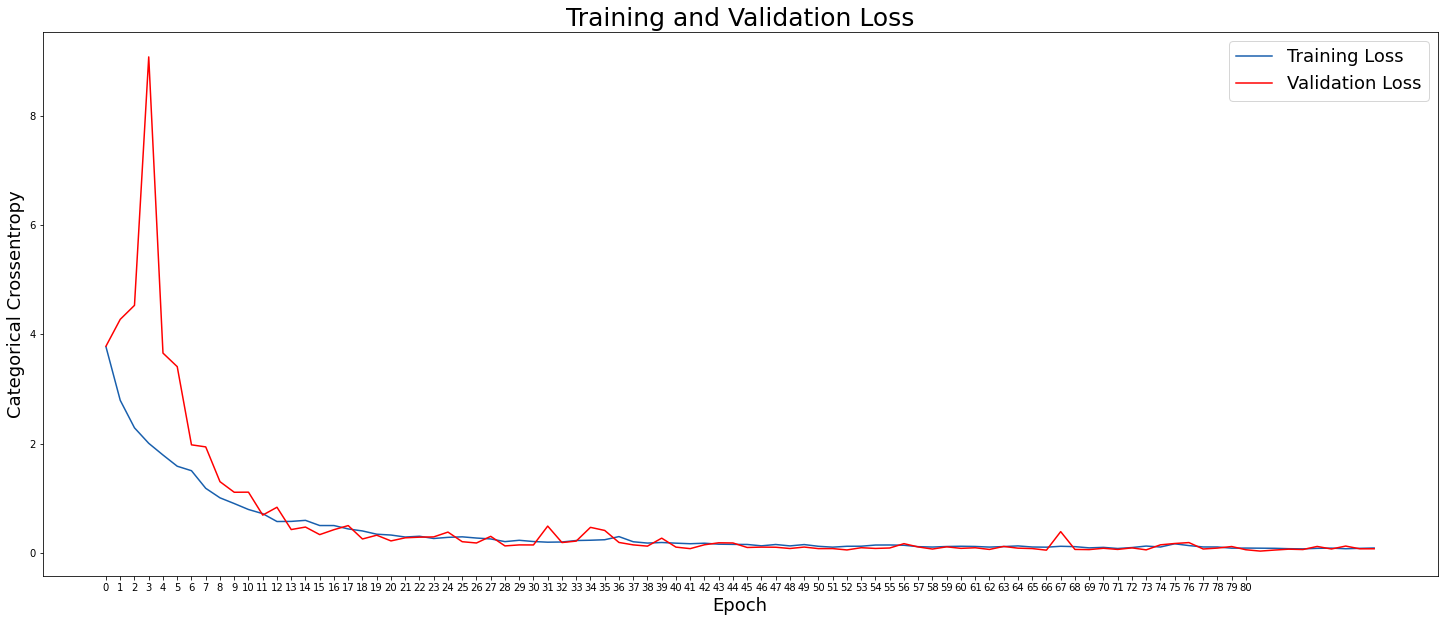

In [ ]:
# Check out our train loss, val loss over epochs.
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']


# Set figure size.
plt.figure(figsize=(25, 10))

# Generate line plot of training, validation loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(val_loss, label = 'Validation Loss', color = 'red')

# Set title
plt.title('Training and Validation Loss', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(81), np.arange(81))

plt.legend(fontsize = 18)

### The reason for the increases/spikes in the loss is the fact that Adam is a stochastic optimizer. Adam uses randomness to minimize and therefore results in these small spikes. From the graph, we can see an overall decrease and flattening of the loss which is a good sign.

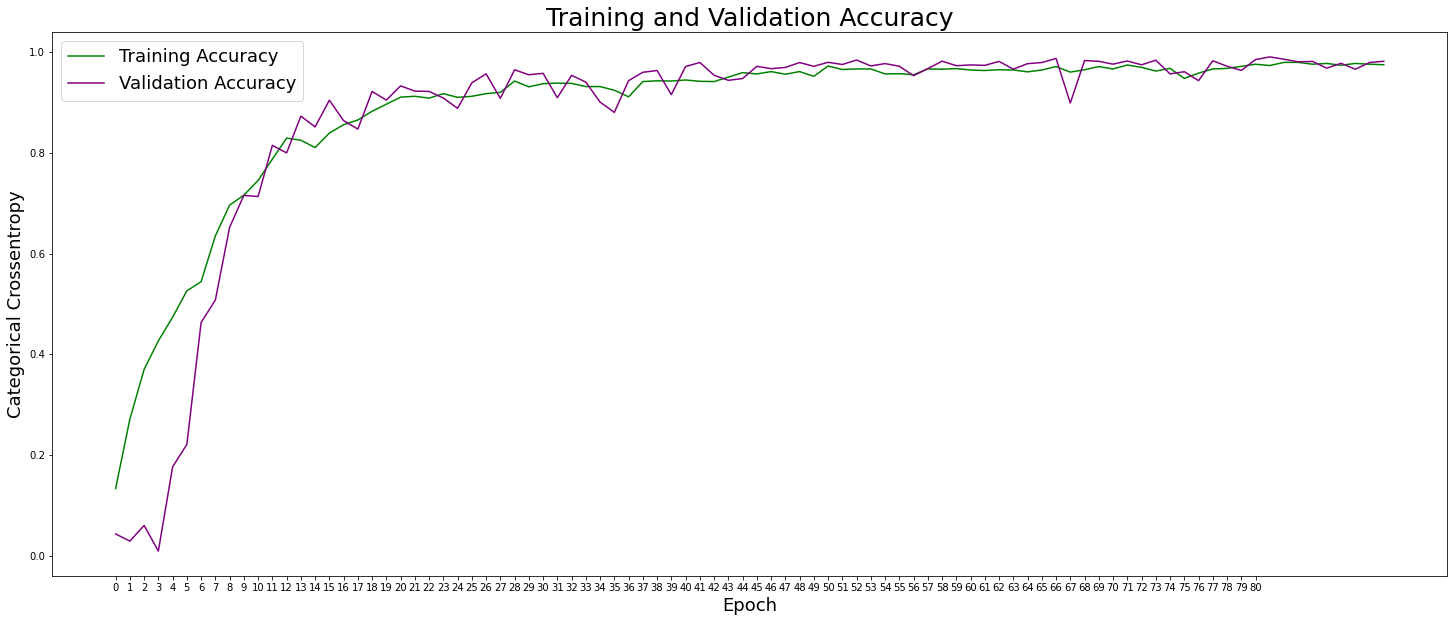

In [ ]:
# Plotting training and validation accuracy
train_accuracy = model_fit.history['accuracy']
val_accuracy = model_fit.history['val_accuracy']


# Set figure size.
plt.figure(figsize=(25, 10))

# Generate line plot of training, validation accuracy over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='green')
plt.plot(val_accuracy, label = 'Validation Accuracy', color = 'purple')

# Set title
plt.title('Training and Validation Accuracy', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(81), np.arange(81))

plt.legend(fontsize = 18)

In [ ]:
# Evaluating my main model
model.evaluate(X_test, y_test)

 10/246 [>.............................] - ETA: 2s - loss: 0.0199 - accuracy: 0.9938

2022-03-08 16:46:37.266697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


246/246 [==============================] - 3s 10ms/step - loss: 0.0278 - accuracy: 0.9939


[0.027820734307169914, 0.9938791394233704]

### In this machine learning problem, we aimed at creating a model which can classify German Traffic Signs by choosing one of 43 different types of signs. There are about 40000 images in the original train dataset which is then split into about 31000 images for train and 9000 images for testing. For this model, we decided to use a Convolutional Neural Network because we knew that it is known for being very accurate and efficient with image classification. In addition, our final model used 4 convolutional layers utilizing MaxPooling, Dropout, Padding, and Batch Normalization. While changing hyperparameters for this model, I was able to acheive 97-98%+ train accuracy. I attempted to balance out the data by manually generating thousands of images but it did not end up working. The ImageDataGenerator function which augmented the data while training helped to combat the imbalances and helped a lot in flattening out the spikes in my loss and accuracy graphs. This improved the overall performance of the model as well.

## Train Accuracy: 98%, Test Accuracy: 99%

### I believe the reason for the Test Accuracy being slightly higher than test is because of the amount of regularization used in Training which is not used in test